# DNA Classification Using Machine Learning 

## About :
In this project, we will explore the world of bioinformatics by using Markov models, K-nearest neighbor (KNN) algorithms, support vector machines, and other common classifiers to classify short E. Coli DNA sequences. This project will use a dataset from the UCI Machine Learning Repository that has 106 DNA sequences, with 57 sequential nucleotides (“base-pairs”) each.





It includes :
<ul>
    <li>Importing data from the UCI repository</li>
    <li>Converting text inputs to numerical data</li>
    <li>Building and training classification algorithms</li>
    <li>Comparing and contrasting classification algorithms</li>
</ul>

In [1]:
# Hide warnings
import warnings
warnings.simplefilter('ignore')

## Step 1: Importing the Dataset

The following code cells will import necessary libraries and import the dataset from the UCI repository as a Pandas DataFram

In [2]:
#import and change module name
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)

In [3]:
data.columns

Index(['Class', 'id', 'Sequence'], dtype='object')

In [4]:
data.head()

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


In [5]:
data.shape

(106, 3)

In [6]:
data.dtypes

Class       object
id          object
Sequence    object
dtype: object

## Step 2: Preprocessing the Dataset

The data is not in a usable form; as a result, we will need to process it before using it to train our algorithms.

In [7]:
# Build our dataset using custom pandas dataframe
clases = data.loc[:,'Class']
clases.head()

0    +
1    +
2    +
3    +
4    +
Name: Class, dtype: object

In [8]:
# generate list of DNA sequence
sequence = list(data.loc[:, 'Sequence'])
sequence

['\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcgt',
 '\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaatctaacgcatcgccaa',
 '\t\tgtactagagaactagtgcattagcttatttttttgttatcatgctaaccacccggcg',
 '\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaatactaacaaactc',
 '\ttcgataattaactattgacgaaaagctgaaaaccactagaatgcgcctccgtggtag',
 '\taggggcaaggaggatggaaagaggttgccgtataaagaaactagagtccgtttaggt',
 '\t\tcagggggtggaggatttaagccatctcctgatgacgcatagtcagcccatcatgaat',
 '\t\ttttctacaaaacacttgatactgtatgagcatacagtataattgcttcaacagaaca',
 '\t\tcgacttaatatactgcgacaggacgtccgttctgtgtaaatcgcaatgaaatggttt',
 '\tttttaaatttcctcttgtcaggccggaataactccctataatgcgccaccactgaca',
 '\tgcaaaaataaatgcttgactctgtagcgggaaggcgtattatgcacaccccgcgccg',
 '\tcctgaaattcagggttgactctgaaagaggaaagcgtaatatacgccacctcgcgac',
 '\tgatcaaaaaaatacttgtgcaaaaaattgggatccctataatgcgcctccgttgaga',
 '\tctgcaatttttctattgcggcctgcggagaactccctataatgcgcctccatcgaca',
 '\ttttatatttttcgcttgtcaggccggaataactccctataatgcgccaccactgaca',
 '\taagcaaagaaatgcttgactctgt

In [9]:
#Remove tab from each sequence
dic = {}
for i, seq in enumerate(sequence):
    nucleotides = list(seq)
    nucleotides = [char for char in nucleotides if char != '\t']
    #append class assignment
    nucleotides.append(clases[i])
    
    dic[i] = nucleotides
dic[0]    

['t',
 'a',
 'c',
 't',
 'a',
 'g',
 'c',
 'a',
 'a',
 't',
 'a',
 'c',
 'g',
 'c',
 't',
 't',
 'g',
 'c',
 'g',
 't',
 't',
 'c',
 'g',
 'g',
 't',
 'g',
 'g',
 't',
 't',
 'a',
 'a',
 'g',
 't',
 'a',
 't',
 'g',
 't',
 'a',
 't',
 'a',
 'a',
 't',
 'g',
 'c',
 'g',
 'c',
 'g',
 'g',
 'g',
 'c',
 't',
 't',
 'g',
 't',
 'c',
 'g',
 't',
 '+']

In [10]:
# Convert Dict object into dataframe
df = pd.DataFrame(dic)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a


In [11]:
# transpose dataframe into correct format
df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [12]:
df.columns

RangeIndex(start=0, stop=58, step=1)

In [13]:
# Rename
df.rename(columns = {57:'Class'}, inplace = True)

In [14]:
df.columns

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,      10,      11,      12,      13,      14,      15,
            16,      17,      18,      19,      20,      21,      22,      23,
            24,      25,      26,      27,      28,      29,      30,      31,
            32,      33,      34,      35,      36,      37,      38,      39,
            40,      41,      42,      43,      44,      45,      46,      47,
            48,      49,      50,      51,      52,      53,      54,      55,
            56, 'Class'],
      dtype='object')

In [15]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


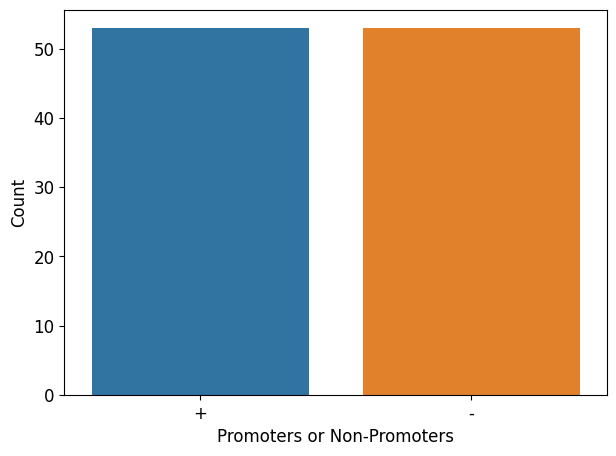

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with a column named 'Class'
plt.figure(figsize=(7, 5))
ax = sns.countplot(x="Class", data=df)

plt.xticks(size=12)
plt.xlabel("Promoters or Non-Promoters", size=12)
plt.yticks(size=12)
plt.ylabel("Count", size=12)

plt.savefig("target_histogram.png")
plt.show()

In [16]:
#Encoding
numerical_df = pd.get_dummies(df)
numerical_df.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,False,False,False,True,True,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
1,False,False,False,True,False,False,True,False,False,True,...,True,False,False,False,True,False,False,False,True,False
2,False,False,True,False,False,False,False,True,True,False,...,False,True,False,False,False,False,True,False,True,False
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,True,False


In [17]:
# Drop class_- or Class_+ either of one
numerical_df.drop('Class_-', axis = 1, inplace = True)
numerical_df.head()

,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,...,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+
0,False,False,False,True,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,True
1,False,False,False,True,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True
2,False,False,True,False,False,False,False,True,True,False,...,False,False,True,False,False,False,False,True,False,True
3,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
4,False,False,False,True,False,True,False,False,False,False,...,True,True,False,False,False,False,False,True,False,True


In [18]:
# rename Class_+ to Class
numerical_df.rename(columns = {'Class_+':'Class'}, inplace = True)

## Step 3: Training and Testing the Classification Algorithms

Now that we have preprocessed the data and built our training and testing datasets, we can start to deploy different classification algorithms. It's relatively easy to test multiple models; as a result, we will compare and contrast the performance of ten different algorithms.

In [19]:
#Importing different classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

In [20]:
from sklearn.model_selection import train_test_split
X = numerical_df.drop(['Class'], axis = 1).values
y = numerical_df['Class'].values

#define a seed for reproducibility
seed = 1

# Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)


In [22]:
# Define scoring method
scoring = 'accuracy'
# Model building to train
names = ['K Nearest Neighbors', 'Gaussian Process', 'Decision Tree', 'Random Forest', 'Neural Net', 'AddaBoost', 'Naive Bayes', 'SVM Linear', 'SVM RBF', 'SVM Sigmoid']
Classifiers = [
    KNeighborsClassifier(n_neighbors = 3),
    GaussianProcessClassifier(1.0*RBF(1.0)),
    DecisionTreeClassifier(max_depth = 5),
    RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1 ),
    MLPClassifier(alpha = 1),
    AdaBoostClassifier(),
    GaussianNB(),
    svm.SVC(kernel = 'linear'),
    svm.SVC(kernel = 'rbf'),
    svm.SVC(kernel = 'sigmoid')
    
    ]
models = zip(names, Classifiers)
# import KFold
from sklearn.model_selection import KFold, cross_val_score

names = []
result = []
for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    result.append(cv_results)
    names.append(name)
    msg = "{0}: {1} ({2})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

K Nearest Neighbors: 0.8107142857142857 (0.099808490089158)
Gaussian Process: 0.8553571428571429 (0.1606051216556957)
Decision Tree: 0.6928571428571428 (0.11539638872431081)
Random Forest: 0.6428571428571429 (0.20640261823999842)
Neural Net: 0.9125 (0.09762812094883318)
AddaBoost: 0.875 (0.1479019945774904)
Naive Bayes: 0.8375 (0.1125)
SVM Linear: 0.9125 (0.09762812094883318)
SVM RBF: 0.875 (0.11180339887498948)
SVM Sigmoid: 0.925 (0.1)


## Step 4 : Model Evaluation

Now that we will evaluate our classification algorithms using accuracy score and classification report.

In [23]:
#Test the algorithm on the test data set
models = zip(names, Classifiers)
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    

K Nearest Neighbors
0.7777777777777778
              precision    recall  f1-score   support

       False       1.00      0.65      0.79        17
        True       0.62      1.00      0.77        10

    accuracy                           0.78        27
   macro avg       0.81      0.82      0.78        27
weighted avg       0.86      0.78      0.78        27

Gaussian Process
0.8888888888888888
              precision    recall  f1-score   support

       False       1.00      0.82      0.90        17
        True       0.77      1.00      0.87        10

    accuracy                           0.89        27
   macro avg       0.88      0.91      0.89        27
weighted avg       0.91      0.89      0.89        27

Decision Tree
0.7037037037037037
              precision    recall  f1-score   support

       False       0.91      0.59      0.71        17
        True       0.56      0.90      0.69        10

    accuracy                           0.70        27
   macro avg       0

## Conclusion : 

#### <i>From above report, Support Vector Machine with 'linear' kernel performed best with F1_score  = 0.96 on testing data.</i>

### Thanks !